In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,KFold, cross_val_score, RepeatedKFold,GridSearchCV

### Load data

Estos datos corresponden a simulaciones matemáticas de un proceso de fabricación de fertilizantes

In [2]:
data = pd.read_excel('fertilizers.xlsx')
features = ['FrSolMF','WatMF','FuMF','AiMF','MillFr','GrVel','CoVel','FrSolPSD','PBlow']
target = 'ExCo'
all_variables = features[:]
all_variables.append(target)
data[all_variables].shape
X = data[features]
y = data[target]

Entrena un RandomForestRegressor (si quieres usar otro no hay problema) y extraer el error de entranamiento (resubstitution error).
Usa R2, MAE y RMSE para mostrar el error
Muestra el error gráficamente con un gráfico de tu conveniencia (se recomienda usar regplot de seaborn).

R^2: 0.99666, RMSE: 0.17869, MAE: 0.13820
NRMSE: 1.37285%


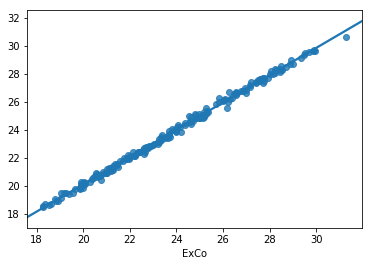

In [3]:
rf = RandomForestRegressor(n_estimators = 100)


Implementa el método hold-out (70%-30%) y muestra los resultados como en el ejercicio anterior

R^2: 0.96352, RMSE: 0.55368, MAE: 0.42965
NRMSE: 4.25375%


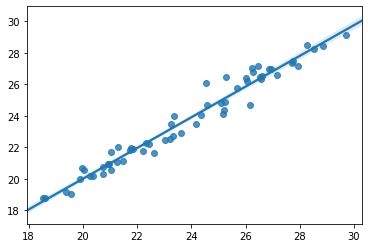

Implementa Kfold CV y extrae el R2 por cada fold, la media y la varianza de todos

[0.96797602 0.9591587  0.96683171 0.97951521 0.97923825]
Mean 10-kfold R Squared: 0.97054397646273 and variance: 6.121465610789958e-05


Haz lo mismo con RepeatedKFold

In [74]:
rf = RandomForestRegressor(n_estimators=100)


[0.97516307 0.97584168 0.96994082 0.98125053 0.96576542 0.95867254
 0.95830439 0.9850329  0.96937955 0.98708369 0.9799758  0.9787891
 0.97511238 0.9163293  0.97679189 0.98511188 0.97644935 0.96359165
 0.98041041 0.9770696  0.97465159 0.9794473  0.94887384 0.9793441
 0.97203876 0.9763521  0.96367533 0.9781624  0.98029453 0.9900537
 0.96335608 0.97944133 0.97561846 0.98112956 0.94341411 0.97720928
 0.96824973 0.98199245 0.96927126 0.98948839 0.99217125 0.97424915
 0.9795323  0.9829222  0.96625945 0.97355188 0.98326192 0.9691213
 0.97365375 0.95259943 0.9777478  0.98163088 0.98709017 0.9679182
 0.97004406 0.98245554 0.98698066 0.98596525 0.97357891 0.95334676
 0.98134026 0.96213159 0.98903392 0.97252906 0.96182518 0.97180082
 0.97127376 0.96740249 0.97443639 0.98732248 0.98420244 0.95364795
 0.98010239 0.95730991 0.97542303 0.97866835 0.9724458  0.97515565
 0.97401372 0.98324764 0.98632037 0.96154376 0.98295215 0.96477197
 0.95806062 0.97209958 0.9756711  0.96428154 0.98467878 0.98344757


Estima la mejor parametrización para el número de estimadores del RandomForest con la función GridSearch.

In [70]:
param_grid = {"n_estimators": [10, 50, 100, 200, 500, 1000]}
rf = RandomForestRegressor()


1000

Con el mejor parámetro que has obtenido vuelve a ejecutar el ejecutar RepeatedKfold, notas algún cambio?

In [75]:
rf = RandomForestRegressor(n_estimators=500)


[0.95617241 0.97359105 0.98413621 0.98502432 0.96619988 0.97472173
 0.99039377 0.97169166 0.9865805  0.95022411 0.97086276 0.9837921
 0.94530625 0.97460944 0.98109116 0.97997248 0.9791081  0.977576
 0.98504059 0.9612994  0.98437863 0.98196271 0.96843473 0.98007722
 0.98460934 0.9751263  0.97756502 0.98654132 0.9537421  0.97277057
 0.97947778 0.96737763 0.97971603 0.97876725 0.97527042 0.97734439
 0.95800885 0.93716398 0.97926257 0.97431997 0.96502079 0.98249252
 0.98479906 0.98175584 0.97530775 0.95905753 0.96582969 0.98572302
 0.98438121 0.97390066 0.97904588 0.97194846 0.95493013 0.97575305
 0.97952213 0.9765443  0.98025315 0.96910487 0.97834144 0.97377617
 0.97982691 0.98047007 0.97253063 0.97570212 0.98274881 0.97316169
 0.97596771 0.97579371 0.97229223 0.98964644 0.98430168 0.97274262
 0.97254897 0.97209474 0.98058949 0.9540458  0.97765609 0.97380077
 0.98085613 0.97819631 0.96363628 0.97825916 0.94202601 0.97373776
 0.98060913 0.9777517  0.95921419 0.97147904 0.97423098 0.9885878